In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets AIML/16-11-2024/Live (1).csv')

In [ ]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(7050, 16)

In [ ]:
df.isnull().sum() #check missing values

,0
status_id,0
status_type,0
status_published,0
num_reactions,0
num_comments,0
num_shares,0
num_likes,0
num_loves,0
num_wows,0
num_hahas,0


In [ ]:
df.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4'],
      dtype='object')

In [ ]:
df.drop(columns=['Column1', 'Column2', 'Column3', 'Column4'],inplace=True)

In [ ]:
df.status_id.value_counts()

,count
status_id,
819700534875473_957599447752247,2
819700534875473_972433889602136,2
819700534875473_981835315328660,2
819700534875473_980941638751361,2
819700534875473_978746665637525,2
...,...
246675545449582_264078163709320,1
246675545449582_264081010375702,1
246675545449582_264089710374832,1


In [ ]:
unique_status_ids_count = df['status_id'].nunique()
print('No. of diff types of variables')
print(unique_status_ids_count)

No. of diff types of variables
6997


In [ ]:
df['status_type'].nunique()

4

In [ ]:
df['status_published'].nunique()

6913

In [ ]:
df.drop(columns=['status_id','status_published'],inplace=True)

In [ ]:
df.status_type.value_counts()

,count
status_type,
photo,4288
video,2334
status,365
link,63


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


In [ ]:
X = df.drop('status_type', axis = 1)  #select feature vector

In [ ]:
y = df['status_type']  #target variable

In [ ]:
print('Feature vector (X):')
print(X.head(2))
print('\nTarget variable (y):')
print(y.head(2))

Feature vector (X):
   num_reactions  num_comments  num_shares  num_likes  ...  num_wows  num_hahas  num_sads  num_angrys
0            529           512         262        432  ...         3          1         1           0
1            150             0           0        150  ...         0          0         0           0

[2 rows x 9 columns]

Target variable (y):
0    video
1    photo
Name: status_type, dtype: object


In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
# Summary of X

summary = X.describe()
print(summary)

       num_reactions  num_comments   num_shares  ...    num_hahas     num_sads   num_angrys
count    7050.000000   7050.000000  7050.000000  ...  7050.000000  7050.000000  7050.000000
mean      230.117163    224.356028    40.022553  ...     0.696454     0.243688     0.113191
std       462.625309    889.636820   131.599965  ...     3.957183     1.597156     0.726812
min         0.000000      0.000000     0.000000  ...     0.000000     0.000000     0.000000
25%        17.000000      0.000000     0.000000  ...     0.000000     0.000000     0.000000
50%        59.500000      4.000000     0.000000  ...     0.000000     0.000000     0.000000
75%       219.000000     23.000000     4.000000  ...     0.000000     0.000000     0.000000
max      4710.000000  20990.000000  3424.000000  ...   157.000000    51.000000    31.000000

[8 rows x 9 columns]


In [ ]:
# Standardization

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
kmeans = KMeans(n_clusters = 150, random_state = 42)
kmeans.fit(X_scaled)

KMeans(n_clusters=150, random_state=42)

In [ ]:
kmeans.cluster_centers_

array([[1.92897815e-02, 6.14890931e-04, 7.58881292e-04, ...,
        1.05101873e-03, 7.79635910e-04, 6.41313410e-05],
       [3.49349211e-01, 2.59129606e-03, 3.42848436e-03, ...,
        1.66158959e-03, 2.60208521e-18, 8.67361738e-19],
       [1.03078556e-01, 4.08903049e-01, 1.23576227e-01, ...,
        4.77707006e-02, 6.12745098e-02, 1.61290323e-02],
       ...,
       [2.73885350e-01, 7.28918533e-02, 1.83119159e-01, ...,
        1.91082803e-02, 0.00000000e+00, 0.00000000e+00],
       [1.95668790e-01, 3.95807527e-03, 4.06542056e-03, ...,
        3.82165605e-03, 3.13725490e-03, 2.58064516e-03],
       [2.78025478e-01, 5.16674607e-02, 1.46320093e-01, ...,
        5.09554140e-02, 2.94117647e-02, 1.29032258e-01]])

In [ ]:
# Inertia: to check cluster are correctly made

kmeans.inertia_

2.971940421997297

In [ ]:
silhoutte_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f'Silhouette Score for 2 clusters:{silhoutte_avg}')


Silhouette Score for 2 clusters:0.42232380985186124


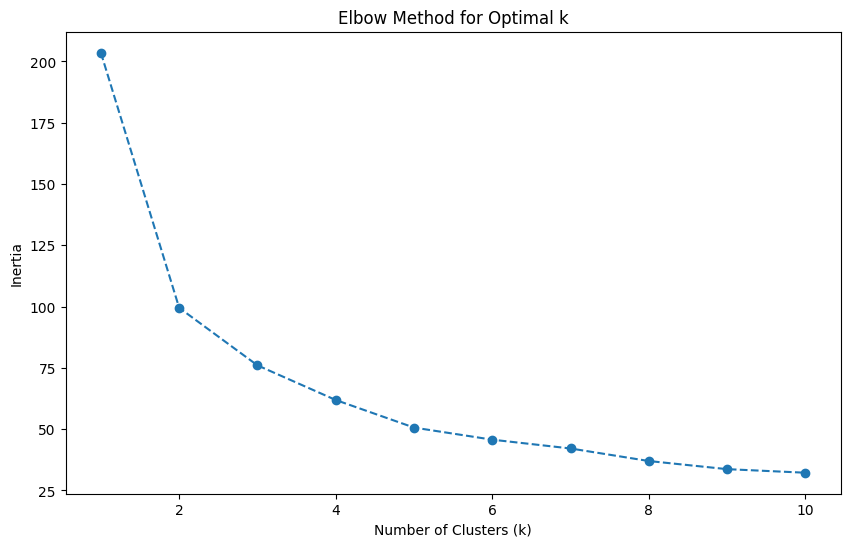

In [ ]:
inertia = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_scaled)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Set cluster to 2
# Fit your model
kmeans2 = KMeans(n_clusters = 2, random_state = 42)
kmeans2.fit(X_scaled)


KMeans(n_clusters=2, random_state=42)

In [ ]:
labels = kmeans2.labels_

# check how many samples were correctly labeled
correct_labels = sum(labels == y)

print("Result: %d out of %d samples were correctly labeled," %(correct_labels, y.size))
print('Accuracy_score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 275 out of 7050 samples were correctly labeled,
Accuracy_score: 0.04
